# Tarea 7
> Carlos Oliveri 

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

In [21]:
class Vertice:
  def __init__(self,x):
    self.clave = x
    self.vecinos = []
    self.dist = 0
    self.color = 'blanco'
    self.padre = None

class Grafos:
  def __init__(self):
    self.vertices = []

  def agregarVertice(self,n):
    self.vertices.append(n)

  def agregarAristas(self,a,b,c):
    a.vecinos.append((b,c))
    b.vecinos.append((a,c))

  def mostrarGrafos(self):
    G = nx.Graph()
    for u in self.vertices:
      for v in u.vecinos:
        G.add_edge(u.clave,v[0].clave)
    nx.draw_circular(G,with_labels = True)
    plt.show()

  def mayorDist(self,s):
    global maxDist, objet
    for u in self.vertices:
      u.padre = None
      u.color = 'blanco'
      u.dist = 0
    maxDist = 0
    s.color = 'gris'
    fila = Cola()
    fila.agregar(s)
    while not fila.vacia():
      u = fila.quitar()
      for v in u.vecinos:
        if v[0].color == 'blanco':
          v[0].color = 'gris'
          v[0].padre = u
          v[0].dist = u.dist + v[1]
          if maxDist < v[0].dist:
            maxDist = v[0].dist
            objet = v[0]
          fila.agregar(v[0])
      u.color = 'negro'
    return maxDist,objet

  def cantTree(self):
    cont = 0;
    for u in self.vertices:
      u.padre = None
      u.color = 'blanco'
      u.dist = 0
    fila = Cola()
    for u in self.vertices:
      if u.color == 'blanco':
        cont = cont + 1
        fila.agregar(u)
        while not fila.vacia():
          i = fila.quitar()
          for v in i.vecinos:
            if v[0].color == 'blanco':
              v[0].color = 'gris'
              v[0].padre = u
              fila.agregar(v[0])
          i.color = 'negro'
    return cont


g1 = Grafos() #Creamos un Grafo Vacio

class Cola:
  def __init__(self):
    self.elementos = []
  def quitar(self):
    if len(self.elementos) == 0:
      print("Cola vacia!!!")
      return None
    return self.elementos.pop(0)
  def agregar(self,elementoNuevo):
    self.elementos.append(elementoNuevo)
  def vacia(self):
    if len(self.elementos) == 0:
      return True

#Esta funcion busca un Vertice a partir de su Clave
def buscarCiudad(ciudad):
  for j in g1.vertices:
    if j.clave == ciudad:
      return j #Devuelve el objeto si lo encuentra
  return False #Si no lo encuentra devuelve False

Ingrese el numero de vertices del Grafo: 6
ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3
1 2 3
ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3
3 4 5
ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3
5 6 7
ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3
8 9 7
ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3
9 7 9


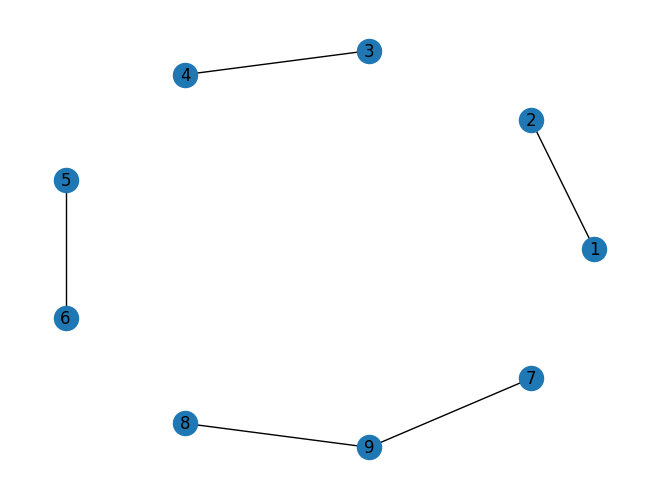

Existen esta cantidad de arbolos en el bosque:
4


In [22]:
n = 0
while n <= 1 or n != int(n):
  #Validacion de tipo de entrada
  try:
    n = int(input("Ingrese el numero de vertices del Grafo: "))
  except:
    print("Valor no valido intente de nuevo")
for k in range(0,n-1):
  print("ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3")
  entrada = input()
  # validacion de formato de entrada / no esta del todo bien validado
  while len(entrada) != 5:
    print('Entrada invalida vuelva a intentar: "1 2 3"')
    entrada = input()
  entrada = entrada.split()
  if (buscarCiudad(entrada[0]) == False):
    g1.agregarVertice(Vertice(entrada[0]))
  if (buscarCiudad(entrada[1]) == False):
    g1.agregarVertice(Vertice(entrada[1]))
  g1.agregarAristas(buscarCiudad(entrada[0]),buscarCiudad(entrada[1]),int(entrada[2]))
g1.mostrarGrafos()
print("Existen esta cantidad de arbolos en el bosque:")
print(g1.cantTree())
